# Import

In [84]:
import pandas as pd
from pathlib import  Path
import  matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Path and Read File

In [69]:
DATA_DIR=Path("../data/houseprice.csv")
data=pd.read_csv(DATA_DIR)
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


# Data Cleaning

In [81]:
data["Area"]=pd.to_numeric(data["Area"],errors='coerce')
data["Area"]=data["Area"].dropna()
data["Area"]=data["Area"].astype(float)
df_area=data["Area"]
Q1=df_area.quantile(0.25)
Q3=df_area.quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_clean=data[(data["Area"] >= lower_bound) & (data["Area"] <= upper_bound)]


data_clean=data_clean.dropna()
data_clean

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67


# Train and Test

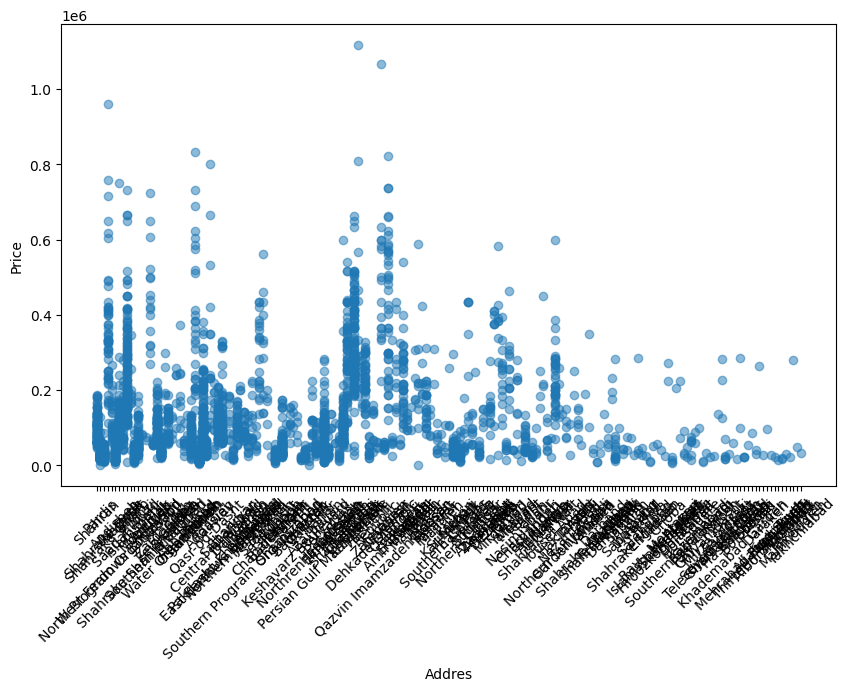

In [87]:
df_price_address=data_clean[["Address","Price(USD)"]]
plt.figure(figsize=(10, 6))
plt.scatter(df_price_address["Address"], df_price_address["Price(USD)"], alpha=0.5)
plt.xlabel('Addres')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()